In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import imageio
import cv2
from matplotlib.colors import hsv_to_rgb

# Planet imagery

## original

In [3]:
planet_img = imageio.imread('../mount/data/planetData/hanBurakLocation/original/planet_2018_apr/10003002_2018_04.tif')

In [4]:
planet_img.shape

(468, 468, 4)

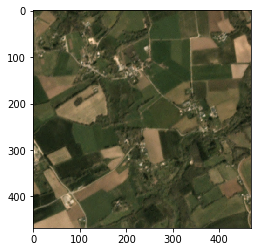

In [5]:
plt.imshow(planet_img[:,:,:3])
plt.show()

## processed

In [6]:
planet_img = imageio.imread('../mount/data/planetData/hanBurakLocation/planet_2018_processed/imgs_apr/10003002.jpeg')
planet_img.shape

(467, 467, 3)

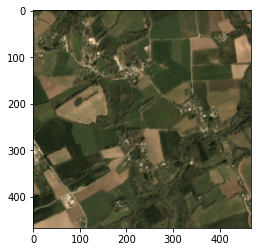

In [5]:
plt.imshow(planet_img[:,:,:3])
plt.show()

## field masks

In [11]:
planet_mask = imageio.imread('../mount/data/planetData/hanBurakLocation/planet_2018_processed/masks_filled_thin/10003002.png')
planet_mask.shape

(467, 467)

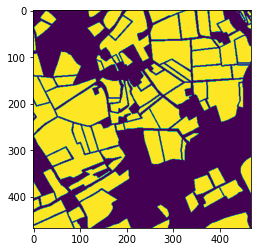

In [12]:
plt.imshow(planet_mask)
plt.show()

## boundary masks

In [6]:
planet_mask = imageio.imread('../mount/data/planetData/hanBurakLocation/planet_2018_processed/masks_boundry_thin/10003002.png')
planet_mask.shape

(467, 467)

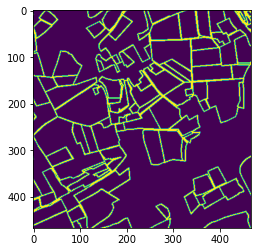

In [7]:
plt.imshow(planet_mask)
plt.show()

## new: distance mask

In [9]:
import sys
sys.path.append('../../resuneta/src')

from bound_dist import get_distance, get_boundary

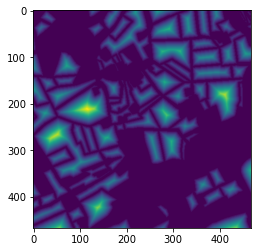

In [13]:
distance_mask = get_distance(planet_mask)
plt.imshow(distance_mask)
plt.show()

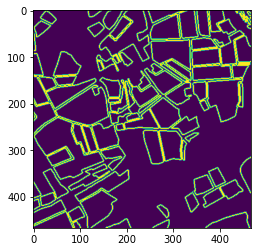

In [18]:
boundary_mask = get_boundary(planet_mask)
plt.imshow(boundary_mask)
plt.show()

## BGR -> HSV

In [22]:
planet_img = cv2.imread('../mount/data/planetData/hanBurakLocation/planet_2018_processed/imgs_apr/10003002.jpeg')
planet_img.shape

(467, 467, 3)

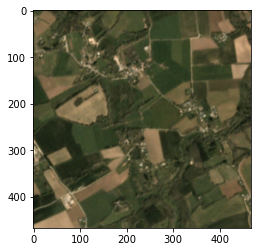

In [25]:
# CV2 reads images as BGR
plt.imshow(planet_img[:,:,[2,1,0]])
plt.show()

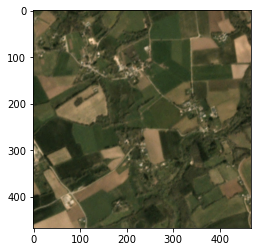

In [47]:
hsv_img = cv2.cvtColor(planet_img, cv2.COLOR_BGR2HSV)

# convert to same scale as matplotlib
hsv_img_new = np.zeros_like(hsv_img, dtype=np.float)
hsv_img_new[:,:,0] = hsv_img[:,:,0] / 179.
hsv_img_new[:,:,1] = hsv_img[:,:,1] / 255.
hsv_img_new[:,:,2] = hsv_img[:,:,2] / 255.

rgb_img = hsv_to_rgb(hsv_img_new)

plt.imshow(rgb_img)
# plt.imshow(hsv_img)
plt.show()

## RGB -> HSV

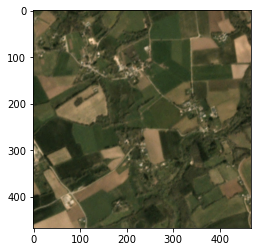

In [4]:
planet_img = imageio.imread('../mount/data/planetData/hanBurakLocation/planet_2018_processed/imgs_apr/10003002.jpeg')
hsv_img = cv2.cvtColor(planet_img, cv2.COLOR_RGB2HSV)

# convert to same scale as matplotlib
hsv_img_new = np.zeros_like(hsv_img, dtype=np.float)
hsv_img_new[:,:,0] = hsv_img[:,:,0] / 179.
hsv_img_new[:,:,1] = hsv_img[:,:,1] / 255.
hsv_img_new[:,:,2] = hsv_img[:,:,2] / 255.

rgb_img = hsv_to_rgb(hsv_img_new)

plt.imshow(rgb_img)
# plt.imshow(hsv_img)
plt.show()

# Predictions